In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Iris data로 군집화

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
irisDF = pd.DataFrame(iris.data, columns=['sl','sw','pl','pw'])

irisDF.sample(3)

,sl,sw,pl,pw
82,5.8,2.7,3.9,1.2
85,6.0,3.4,4.5,1.6
30,4.8,3.1,1.6,0.2


### KMeans 모델 생성/학습

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=2021)
kmeans.fit(irisDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
irisDF['target'] = iris.target    # 실제 target Class
irisDF['cluster'] = kmeans.labels_  # Clustering 결과 도출된 Class  
irisDF.sample(5)

,sl,sw,pl,pw,target,cluster
21,5.1,3.7,1.5,0.4,0,1
25,5.0,3.0,1.6,0.2,0,1
68,6.2,2.2,4.5,1.5,1,0
46,5.1,3.8,1.6,0.2,0,1
132,6.4,2.8,5.6,2.2,2,2


In [ ]:
clustering_result = irisDF.groupby(['target','cluster']).count()
clustering_result

sl  sw  pl  pw
target cluster                
0      1        50  50  50  50
1      0        48  48  48  48
       2         2   2   2   2
2      0        14  14  14  14
       2        36  36  36  36

## 군집화 결과를 차원축소하여 시각화

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
iris_std = scaler.fit_transform(iris.data)

pca = PCA()
iris_pca = pca.fit_transform(iris_std)

In [ ]:
irisDF['pca_x'] = iris_pca[:,0]
irisDF['pca_y'] = iris_pca[:,1]
irisDF.head()

,sl,sw,pl,pw,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,1,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,1,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,1,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,1,-2.389842,0.646835


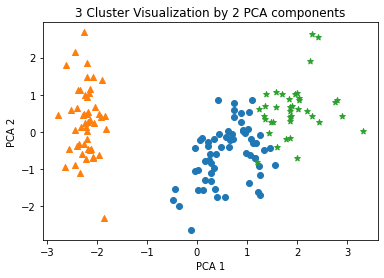

In [ ]:
cls0_index = irisDF[irisDF.cluster == 0].index
cls1_index = irisDF[irisDF.cluster == 1].index
cls2_index = irisDF[irisDF.cluster == 2].index

plt.scatter(x=irisDF.loc[cls0_index, 'pca_x'],
            y=irisDF.loc[cls0_index, 'pca_y'],
            marker='o')
plt.scatter(x=irisDF.loc[cls1_index, 'pca_x'],
            y=irisDF.loc[cls1_index, 'pca_y'],
            marker='^')
plt.scatter(x=irisDF.loc[cls2_index, 'pca_x'],
            y=irisDF.loc[cls2_index, 'pca_y'],
            marker='*')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Cluster Visualization by 2 PCA components')
plt.show()

In [ ]:
cls0_index,cls1_index,cls2_index

(Int64Index([ 50,  51,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
              64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
              78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
              91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 106, 113, 114,
             119, 121, 123, 126, 127, 133, 138, 142, 146, 149],
            dtype='int64'),
 Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
             34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
            dtype='int64'),
 Int64Index([ 52,  77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112,
             115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132,
             134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148],
            dtype='int64'))

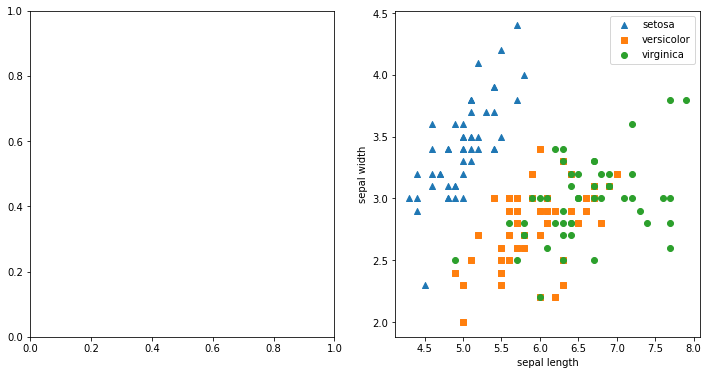

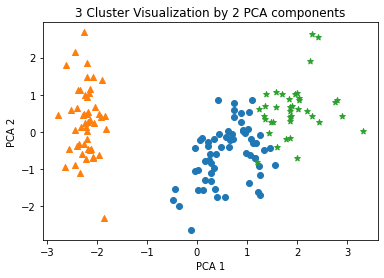

In [ ]:
    # 그래프 2개 그리기
    fig, asx = plt.subplots(figsize=(12,6),ncols=2,nrows=1)
    #setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
    markers=['^', 's', 'o']

    #setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
    for i, marker in enumerate(markers):
        x_axis_data = irisDF[irisDF['target']==i]['sl']
        y_axis_data = irisDF[irisDF['target']==i]['sw']
        plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

    plt.legend()
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.show()
    cls0_index = irisDF[irisDF.cluster == 0].index
    cls1_index = irisDF[irisDF.cluster == 1].index
    cls2_index = irisDF[irisDF.cluster == 2].index

    plt.scatter(x=irisDF.loc[cls0_index, 'pca_x'],
                y=irisDF.loc[cls0_index, 'pca_y'],
                marker='o')
    plt.scatter(x=irisDF.loc[cls1_index, 'pca_x'],
                y=irisDF.loc[cls1_index, 'pca_y'],
                marker='^')
    plt.scatter(x=irisDF.loc[cls2_index, 'pca_x'],
                y=irisDF.loc[cls2_index, 'pca_y'],
                marker='*')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('3 Cluster Visualization by 2 PCA components')
    plt.show()

## Clustering 알고리즘 테스트를 위한 데이터 생성

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200,n_features=2,centers=3,
                  cluster_std=4,random_state=2021)
print(X.shape,y.shape)

(200, 2) (200,)


In [ ]:
#target의 분포
uniqe, counts = np.unique(y, return_counts=True)
print(uniqe, counts)

[0 1 2] [67 67 66]


In [ ]:
clusterDF = pd.DataFrame(X, columns=['ftr1','ftr2'])
clusterDF['target'] = y
clusterDF.head()

,ftr1,ftr2,target
0,-1.420755,0.524051,1
1,9.606759,-16.785233,2
2,9.463470,-12.342820,2
3,5.992541,-9.566412,2
4,-5.988626,4.843629,1


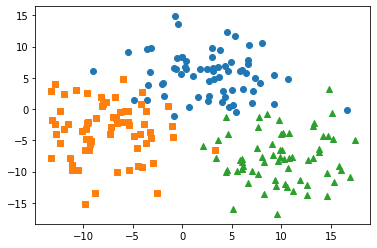

In [ ]:
markers=['o','s','^','p','D','H','x']

target_list = np.unique(y)
for target in target_list:
    target_cluster = clusterDF[clusterDF.target == target]
    plt.scatter(x = target_cluster['ftr1'],
                y = target_cluster['ftr2'],
                marker = markers[target])
plt.show()

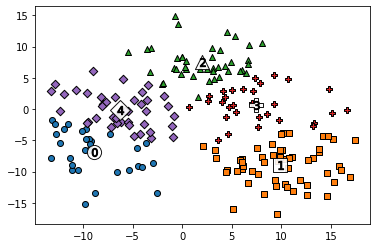

In [ ]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=5,random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()